Доброго всем дня! 

На прошлом уроке мы с Вами строили кривые обучения, которые иллюстрируют зависимость производительности модели от количества данных, на которых модель обучалась.

Кроме этих кривых, рассматривают еще кривые валидации. Это кривые - характеризующие зависимость показателей производительности модели (метрик) от сложности модели.
То есть берется, например, решающее дерево, фиксируется его максимальная глубина (параметр, характеризующий сложность модели) равная 2, дерево обучается на ВСЕМ обучающем наборе после чего запоминаются его метрики на обучающем и тестовом наборе данных. 
Затем глубина устанавливается в 3 и проделывается все то же самое (обучение, оценка, запомнили оценку) 
и так далее … до разумной глубины дерева
После чего строим графики оценок.

Задача
Используя код написанный на уроке (хотя это и не обязательно) напишите функцию, строящую кривые валидации.
В качестве модели возьмите DecisionTreeClassifier
В качестве набора данных возьмите набор о поступающих в колледж из 19-го домашнего задания.


In [136]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, \
              recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score, \
              auc, mean_squared_error, accuracy_score
import math
plt.rcParams["figure.figsize"] = (12,6)
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

In [87]:
df = pd.read_csv('data.csv')

In [88]:
df

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,in_college
0,Academic,A,Male,Less Interested,Urban,56,6950000,83.0,84.09,False,True
1,Academic,A,Male,Less Interested,Urban,57,4410000,76.8,86.91,False,True
2,Academic,B,Female,Very Interested,Urban,50,6500000,80.6,87.43,False,True
3,Vocational,B,Male,Very Interested,Rural,49,6600000,78.2,82.12,True,True
4,Academic,A,Female,Very Interested,Urban,57,5250000,75.1,86.79,False,False
...,...,...,...,...,...,...,...,...,...,...,...
995,Vocational,A,Female,Very Interested,Rural,49,7420000,63.6,85.99,True,True
996,Academic,B,Female,Less Interested,Rural,51,7480000,84.3,89.72,True,True
997,Vocational,A,Male,Less Interested,Urban,49,5550000,75.2,79.56,False,True
998,Academic,B,Male,Uncertain,Rural,53,5840000,105.8,87.18,True,True


In [89]:
df['in_college'] = df['in_college'].astype('int')

In [90]:
df['type_school'] = df['type_school'].map({'Academic':0, 'Vocational':1})
df['school_accreditation'] = df['school_accreditation'].map({'A':0, 'B':1})
df['gender'] = df['gender'].map({'Male':0, 'Female':1})
df['residence'] = df['residence'].map({'Urban':0, 'Rural':1})
df['interest'] = df['interest'].map({'Very Interested':0, 'Uncertain':1,'Less Interested':2,'Quiet Interested':3,'Not Interested':4})

In [91]:
X = df.drop(['in_college'], axis = 1)
Y = df['in_college']

In [81]:
Y

0      1
1      1
2      1
3      1
4      0
      ..
995    1
996    1
997    1
998    1
999    0
Name: in_college, Length: 1000, dtype: int32

In [131]:
# Передаем какую-то модель и полное наше множество.
def plot_learning_curve(model,X, Y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

# Create a pipeline; This will be passed as an estimator to learning curve method

    pipeline = make_pipeline(StandardScaler(),
                        model)

# Use learning curve to get training and test scores along with train sizes

    train_sizes, train_scores, test_scores = learning_curve(estimator=pipeline, X=X_train, y=y_train,
                                                       cv=10, train_sizes=np.linspace(0.1, 1.0, 10),
                                                     n_jobs=-1)
# Calculate training and test mean and std
#
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
#
# Plot the learning curve
#
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
#plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
    plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
#plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
    plt.title('Learning Curve')
    plt.xlabel('Training Data Size')
    plt.ylabel('Model accuracy')
    plt.grid()
    plt.legend(loc='lower right')
    #plt.show()


In [134]:
clf = DecisionTreeClassifier(max_depth = 5)

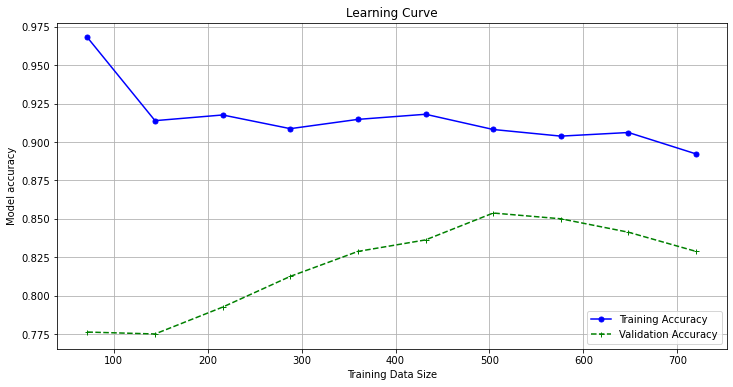

In [135]:
plot_learning_curve(clf,X,Y)

Для модели с переоснащением/высокой дисперсией существует большой разрыв между точностью обучения и проверки.
Кроме того, точность обучения может оказаться выше желаемой.
Чтобы уменьшить переоснащение, рассмотрите возможность добавления дополнительных функций и данных 
(хотя добавление данных может не всегда работать).
Для регуляризованных моделей рассмотрите возможность увеличения значения регуляризации. 
Но будьте осторожны, иначе модель не подойдет.


For training sample size less than 500, the difference between training and validation accuracy is much larger. This is the case of overfitting
For training size greater than 500, the model is better. It is a sign of good(but we need better...) bias-variance trade-off.

# ВАРИАНТ НОМЕР 2 ПРАВИЛЬНОЕ РЕШЕНИЕ:

In [141]:
df = pd.read_csv('data.csv')

In [142]:
df['in_college'] = df['in_college'].astype('int')

In [143]:
df['type_school'] = df['type_school'].map({'Academic':0, 'Vocational':1})
df['school_accreditation'] = df['school_accreditation'].map({'A':0, 'B':1})
df['gender'] = df['gender'].map({'Male':0, 'Female':1})
df['residence'] = df['residence'].map({'Urban':0, 'Rural':1})
df['interest'] = df['interest'].map({'Very Interested':0, 'Uncertain':1,'Less Interested':2,'Quiet Interested':3,'Not Interested':4})

In [144]:
X = df.drop(['in_college'], axis = 1)
Y = df['in_college']

In [152]:
# Передаем какую-то модель и полное наше множество.
def plot_lc_cl (X, Y, depth):
    X_t, X_v, Y_t, Y_v = train_test_split(X, Y, test_size = 0.2, random_state = 5)
#списки заводим для накопления ошибок (значения метрик accracy) 
    acc_t, acc_v = [], [] 
#    (1, len(X_t)) - это значит мы идем от первого элемента до конца длины нашего множества.
    for m in depth:
        model = DecisionTreeClassifier(max_depth = m)
#        срез это фактически первый элемент и на нем обучаем данные и так по одному идет
        model.fit (X_t, Y_t)
        pred_t = model.predict(X_t)
        pred_v = model.predict(X_v)
        
        acc_t.append(accuracy_score(Y_t, pred_t))
        acc_v.append(accuracy_score(Y_v, pred_v))
    plt.plot(acc_t, 'r--^')
    plt.plot(acc_v, 'b-o')
    plt.grid()

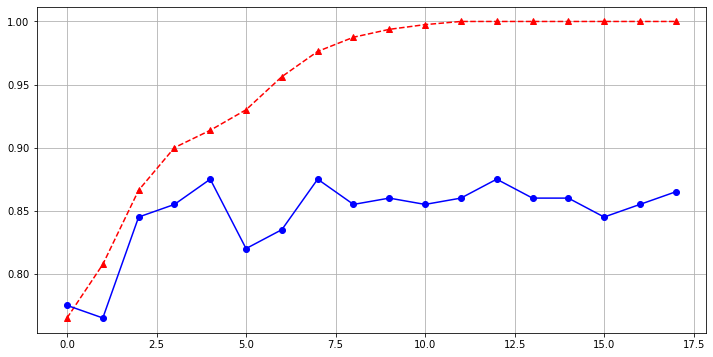

In [153]:
plot_lc_cl(X,Y,np.array(range(2,20,1)))